# Oxygen tolerance prediction

See https://git.bia-christian.de/bia/lab_book_VEO/wiki/abiotic_factors#oxygen-tolerance

Scripts adapted from https://github.com/ProfHeydeFranca/BacterialData

# Drop_na.py

In [85]:
#Turn off scientific notation
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})

#Activate print all activities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [86]:
import pickle
import zstandard
import pandas as pd
import numpy as np
import time
from datetime import datetime

ts = time.time() 
print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected.pickle.zst', 
                    'rb') as f:
	df = pickle.load(f)

ts = time.time() 
print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

/tmp/ipykernel_16112/3519915092.py:9: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


Started script! Loading input file... 2024-06-18 13:24:11
Loaded input pickle zst file... 2024-06-18 13:24:26


/tmp/ipykernel_16112/3519915092.py:17: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


In [87]:
df.head()
df.shape

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTCTCAAA,TTTGAAAAA,TTTGACAAA,TTTGCAAAA,TTTGCCAAA,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,Oxygen tolerance
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,53,72,54,82,96,11,52,52,95,46,...,37,74,49,98,59,36,54,69,66,anaerobe
1006155.5,47,87,88,137,237,80,131,139,229,159,...,84,314,65,180,75,161,133,268,324,anaerobe
1007092.3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaN
1007099.4,15,27,18,12,17,36,33,8,12,53,...,9,13,2,5,2,10,3,7,7,NaN
1008452.3,14,11,26,39,78,14,41,64,104,62,...,95,248,128,98,59,114,108,214,245,microaerophile


(13554, 131073)

In [88]:
# Selecionar as features e o target
# Excluir os dados com salinidade igual a 0.0
# Contar quantas linhas possuem NaN na coluna 'Salinity group'
nan_count = df['Oxygen tolerance'].isna().sum()

# Imprimir o número de linhas com NaN na coluna 'Salinity group'
print("Número de linhas com NaN na coluna de fator abiotico antes de deletar:", nan_count)

Número de linhas com NaN na coluna de fator abiotico antes de deletar: 6299


In [89]:
df_filtered = df.dropna(subset=['Oxygen tolerance'])
df_filtered.shape

list(set(df_filtered['Oxygen tolerance']))
len(list(set(df_filtered['Oxygen tolerance'])))

(7255, 131073)

['anaerobe',
 'obligate anaerobe-anaerobe',
 'facultative anaerobe-anaerobe',
 'facultative anaerobe-aerobe-anaerobe',
 'facultative anaerobe-aerobe',
 'microaerophile-facultative anaerobe',
 'facultative anaerobe',
 'facultative aerobe-facultative anaerobe',
 'aerobe',
 'microaerophile',
 'microaerophile-aerotolerant',
 'microaerophile-anaerobe-aerobe-facultative anaerobe',
 'facultative anaerobe-obligate anaerobe-aerobe',
 'facultative aerobe-obligate anaerobe',
 'microaerophile-aerobe-anaerobe',
 'aerobe-anaerobe',
 'facultative anaerobe-facultative aerobe',
 'microaerophile-microaerotolerant',
 'obligate aerobe',
 'anaerobe-aerobe',
 'microaerophile-facultative aerobe-anaerobe',
 'facultative aerobe-anaerobe-aerobe',
 'microaerophile-anaerobe-aerobe',
 'facultative anaerobe-anaerobe-aerobe',
 'facultative aerobe-anaerobe',
 'microaerophile-obligate aerobe',
 'microaerophile-anaerobe-facultative anaerobe',
 'anaerobe-aerotolerant',
 'facultative anaerobe-aerobe-microaerophile',
 'ob

45

In [90]:
#Sub-groups of oxygen tolerance will be clustered into larger groups 
#Details: https://git.bia-christian.de/bia/lab_book_VEO/wiki/Heyde#oxygen
#Replacing: https://note.nkmk.me/en/python-pandas-replace/

#AEROBES
df_filtered = df_filtered.replace({'Oxygen tolerance': ['aerobe', 'obligate aerobe', 'obligate aerobe-aerobe']}, 'aerobe')

#ANAEROBES
df_filtered = df_filtered.replace({'Oxygen tolerance': ['anaerobe', 'obligate anaerobe-anaerobe', 'obligate anaerobe']}, 'anaerobe')

#FACULTATIVES
df_filtered = df_filtered.replace({'Oxygen tolerance': ['anaerobe-aerobe', 'facultative anaerobe-aerobe', 'microaerophile', 
                                                        'microaerophile-aerobe', 'microaerophile-anaerobe', 
                                                        'microaerophile-anaerobe-aerobe', 'facultative anaerobe-anaerobe',
                                                       'facultative anaerobe-aerobe-anaerobe', 'microaerophile-facultative anaerobe',
                                                       'facultative anaerobe', 'facultative aerobe-facultative anaerobe',
                                                        'microaerophile-aerotolerant', 'microaerophile-anaerobe-aerobe-facultative anaerobe',
                                                        'facultative anaerobe-obligate anaerobe-aerobe', 
                                                        'facultative aerobe-obligate anaerobe', 'microaerophile-aerobe-anaerobe',
                                                        'aerobe-anaerobe', 'facultative anaerobe-facultative aerobe',
                                                        'microaerophile-microaerotolerant', 'facultative', 
                                                        'microaerophile-facultative aerobe-anaerobe', 
                                                        'facultative aerobe-anaerobe-aerobe', 'facultative anaerobe-anaerobe-aerobe', 
                                                        'facultative aerobe-anaerobe', 'microaerophile-obligate aerobe', 
                                                        'microaerophile-anaerobe-facultative anaerobe', 'anaerobe-aerotolerant',
                                                        'facultative anaerobe-aerobe-microaerophile', 
                                                        'facultative anaerobe-anaerobe-microaerophile', 
                                                        'microaerophile-aerobe-facultative anaerobe', 
                                                        'microaerophile-facultative anaerobe-aerobe', 'facultative aerobe', 
                                                        'microaerophile-obligate aerobe-facultative anaerobe', 'anaerobe-microaerotolerant',
                                                        'aerotolerant', 'facultative aerobe-aerobe', 'facultative anaerobe-microaerophile', 
                                                        'microaerophile-facultative anaerobe-anaerobe', 'microaerophile-facultative aerobe', 
                                                        'microaerophile-facultative aerobe-facultative anaerobe'
                                                       ]}, 'facultative')

In [91]:
list(set(df_filtered['Oxygen tolerance']))
len(list(set(df_filtered['Oxygen tolerance'])))

df_filtered.shape

['anaerobe', 'aerobe', 'facultative']

3

(7255, 131073)

In [92]:
with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 'wb') as f:
	pickle.dump(df_filtered, f)

# Salvar o DataFrame filtrado como um arquivo CSV
print("Saved selected data in output file", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

Saved selected data in output file 2024-06-18 13:24:26


/tmp/ipykernel_16112/1585836620.py:6: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Saved selected data in output file", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


# PCA_groups_Filtered.py

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [94]:
import pickle
import zstandard
import time
from datetime import datetime

ts = time.time() 
print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected-filterNA.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 
                    'rb') as f:
	df = pickle.load(f)

ts = time.time() 
print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

/tmp/ipykernel_16112/574650394.py:7: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


Started script! Loading input file... 2024-06-18 13:26:12
Loaded input pickle zst file... 2024-06-18 13:26:19


/tmp/ipykernel_16112/574650394.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


In [95]:
df.head()
df.shape

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTCTCAAA,TTTGAAAAA,TTTGACAAA,TTTGCAAAA,TTTGCCAAA,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,Oxygen tolerance
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,53,72,54,82,96,11,52,52,95,46,...,37,74,49,98,59,36,54,69,66,anaerobe
1006155.5,47,87,88,137,237,80,131,139,229,159,...,84,314,65,180,75,161,133,268,324,anaerobe
1008452.3,14,11,26,39,78,14,41,64,104,62,...,95,248,128,98,59,114,108,214,245,facultative
1009464.3,30,18,5,24,34,11,24,23,28,17,...,35,80,23,232,77,77,82,82,85,anaerobe
102684.41,34,38,33,57,122,30,65,88,120,105,...,67,327,158,131,112,173,100,254,328,facultative


(7255, 131073)

In [96]:
X = df.iloc[:, :-1]  # Todas as colunas exceto a última
y = df.iloc[:, -1]   # Última coluna

In [97]:
y.isnull().any() #Check if any value is null
X.isnull().any().any()
list(set(y))

False

False

['anaerobe', 'aerobe', 'facultative']

In [98]:
#CONSIDERATIONS: since Gene Families is binary, this step can be skipped. The data is already scaled
#ONLY FOR KMERS

# Mapear as classes para valores numéricos
class_mapping = {'anaerobe': 0, 'facultative': 1, 'aerobe': 2}

y_mapped = y.map(class_mapping)

print(y_mapped.head(2))

#ChatGPT:
#StandardScaler is imported from sklearn.preprocessing.
# scaler is an instance of StandardScaler, which standardizes features by removing the mean and scaling to unit variance. 
# This ensures that each feature contributes equally to the analysis.
# The result, X_scaled, is a scaled version of X where each feature has been standardized
#Scaling is a standardization (transforming data to have a mean of 0 and a standard deviation of 1) or normalization 
# (scaling data to a [0, 1] range)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Best assembly
1002367.3    0
1006155.5    0
Name: Oxygen tolerance, dtype: int64


In [99]:
X_scaled

array([[-0.01, -0.01, -0.27, ..., -0.32, -0.47, -0.53],
       [-0.06, 0.14, 0.05, ..., 0.34, 0.15, 0.71],
       [-0.36, -0.64, -0.54, ..., 0.13, -0.02, 0.33],
       ...,
       [-0.48, -0.72, -0.78, ..., -0.74, -0.68, -0.77],
       [0.33, 0.76, 1.06, ..., 0.79, 0.49, 0.60],
       [-0.08, -0.08, -0.19, ..., -0.66, -0.63, -0.66]])

In [100]:
# Criar um grid para testar diferentes números de componentes principais
num_components_range = np.arange(1, 1001, 50)

# Lista para armazenar a variância explicada
explained_variance_ratios = []

# Loop sobre diferentes números de componentes principais
for n_components in num_components_range:
    
    # Initialize PCA with the current number of components
    pca = PCA(n_components=n_components)

    # Fit the PCA model to the data and transform the data to principal component space
    X_pca = pca.fit_transform(X)
    #X_pca = pca.fit_transform(X_scaled)

    # Sum the explained variance ratios of the selected components and append to the list
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

In [101]:
num_components_range

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])

In [102]:
importancia_variaveis = pd.DataFrame(explained_variance_ratios, columns=['Importancia'])
# Salvar importância das variáveis em um arquivo CSV
#importancia_variaveis.to_csv('/home/wi38kap/BacterialData/importancia_variaveis_filtered.csv', index=False)

importancia_variaveis

,Importancia
0,0.63
1,0.94
2,0.96
3,0.97
4,0.97
5,0.97
6,0.98
7,0.98
8,0.98
9,0.98


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Número de Componentes Principais')

Text(0, 0.5, 'Variância Explicada')

Text(0.5, 1.0, 'Importância das Variáveis em relação ao Número de Componentes Principais')

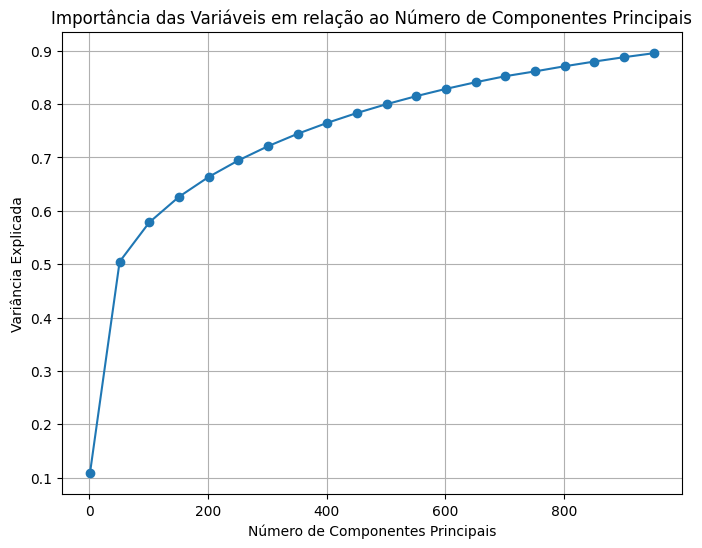

In [84]:
# Plotar gráfico de importância das variáveis
plt.figure(figsize=(8, 6))
plt.plot(num_components_range, explained_variance_ratios, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Importância das Variáveis em relação ao Número de Componentes Principais')
plt.grid(True)
#plt.savefig('/home/bia/Documents/BacterialData/oxygen/figures/importancia_variaveis_filtered_oxigen_gene-families.png')  # Salvar o gráfico como imagem
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Número de Componentes Principais')

Text(0, 0.5, 'Variância Explicada')

Text(0.5, 1.0, 'Importância das Variáveis em relação ao Número de Componentes Principais')

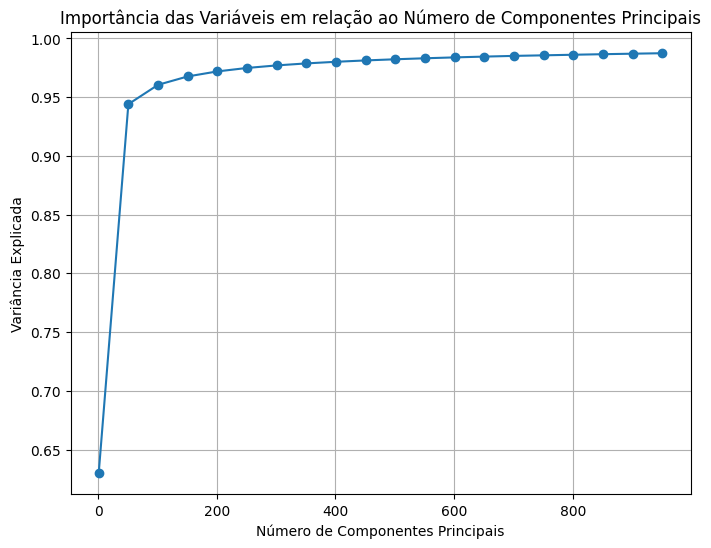

In [103]:
# Plotar gráfico de importância das variáveis
plt.figure(figsize=(8, 6))
plt.plot(num_components_range, explained_variance_ratios, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Importância das Variáveis em relação ao Número de Componentes Principais')
plt.grid(True)
plt.savefig('/home/bia/Documents/BacterialData/oxygen/figures/importancia_variaveis_filtered_oxigen_kmer9.png')  # Salvar o gráfico como imagem
plt.show()

In [104]:
resultado_pca = pd.DataFrame(X_pca, columns=[f'Componente Principal {i+1}' for i in range(X_pca.shape[1])])
resultado_pca
# Salvar os resultados do PCA em um arquivo CSV
#resultado_pca.to_csv('/home/wi38kap/BacterialData/resultado_pcafiltered.csv', index=False)

,Componente Principal 1,Componente Principal 2,Componente Principal 3,Componente Principal 4,Componente Principal 5,Componente Principal 6,Componente Principal 7,Componente Principal 8,Componente Principal 9,Componente Principal 10,...,Componente Principal 942,Componente Principal 943,Componente Principal 944,Componente Principal 945,Componente Principal 946,Componente Principal 947,Componente Principal 948,Componente Principal 949,Componente Principal 950,Componente Principal 951
0,-7721.35,-3230.67,-2166.17,573.40,-1593.27,-857.70,143.01,-904.78,345.14,738.79,...,-40.45,9.93,-22.26,15.71,12.08,76.55,36.43,23.67,25.64,-26.78
1,-10989.15,675.05,-56.04,816.67,-1029.61,1.15,1128.09,1113.71,-71.30,-361.66,...,4.81,-51.41,8.52,87.68,9.45,74.03,-15.91,13.61,69.73,-72.11
2,-11277.37,-1730.76,-3831.87,79.02,429.11,-128.92,925.62,745.72,300.27,638.81,...,-1.86,7.70,9.19,-0.58,23.59,8.46,9.82,-10.01,-0.62,-25.54
3,-10618.16,-3197.19,-4628.85,504.58,861.09,-599.53,1035.57,943.39,-116.15,194.46,...,38.50,-37.96,67.41,-8.14,-0.57,-16.10,-22.65,-22.15,22.02,11.04
4,-11541.99,-1275.70,-3931.45,356.72,776.78,-607.69,1184.98,1219.11,94.50,-173.91,...,-31.48,-31.66,-17.04,-9.08,-2.72,-28.32,-20.05,8.67,16.14,-22.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,-1120.97,-3884.28,5530.11,-2950.47,-1638.53,-1866.40,1619.58,-692.58,-1154.73,58.82,...,6.44,-26.09,-24.78,22.09,12.15,-19.36,-44.33,26.04,-2.83,-27.07
7251,-11128.98,1037.18,1034.81,-951.60,-1790.78,1507.78,269.79,-390.30,858.21,3996.14,...,-10.03,37.32,-15.63,32.96,33.86,-115.55,61.57,-82.42,-40.28,-11.77
7252,107.19,-6477.30,-73.22,1838.04,-213.54,505.59,-1488.11,959.93,-1628.74,-408.99,...,25.88,-2.25,15.76,3.50,6.32,12.87,-0.62,-4.12,-5.61,19.52
7253,-12702.17,3937.35,957.94,475.31,-812.83,453.77,780.01,313.21,632.08,538.01,...,-10.85,-115.05,-44.18,-17.88,1.95,-28.07,32.13,24.55,15.01,13.98


<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_16112/2052991525.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5)


Text(0.5, 1.0, 'Gráfico de Dispersão (PCA)')

Text(0.5, 0, 'Componente Principal 1')

Text(0, 0.5, 'Componente Principal 2')

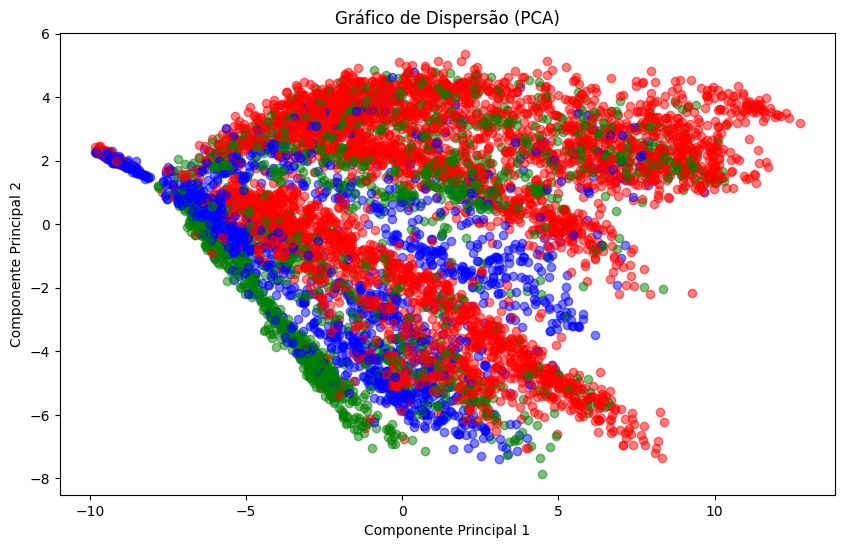

In [80]:
#Gene families
# Plotar gráfico de visualização dos dados
# Mapear cores para as classes 'low', 'medium' e 'high'
colors = {0: 'blue', 1: 'green', 2: 'red'}
#class_mapping = {'anaerobe': 0, 'facultative': 1, 'aerobe': 2}

# Plotar o gráfico de dispersão com as cores mapeadas
plt.figure(figsize=(10, 6))
for i in range(len(X_pca)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5)
plt.title("Gráfico de Dispersão (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
#plt.savefig('scatter_plot_PCA.png')

plt.show()

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_16112/809607744.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5)


Text(0.5, 1.0, 'Gráfico de Dispersão (PCA)')

Text(0.5, 0, 'Componente Principal 1')

Text(0, 0.5, 'Componente Principal 2')

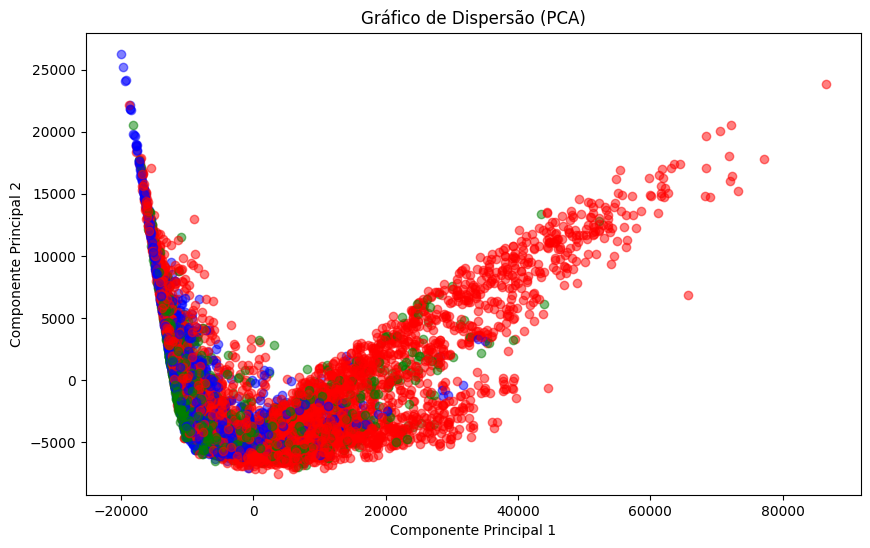

In [105]:
#kmers
# Plotar gráfico de visualização dos dados
# Mapear cores para as classes 'low', 'medium' e 'high'
colors = {0: 'blue', 1: 'green', 2: 'red'}
#class_mapping = {'anaerobe': 0, 'facultative': 1, 'aerobe': 2}

# Plotar o gráfico de dispersão com as cores mapeadas
plt.figure(figsize=(10, 6))
for i in range(len(X_pca)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5)
plt.title("Gráfico de Dispersão (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.savefig('figures/scatter_plot_PCA_oxygen_kmer9.png')

plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Matriz de Covariância')

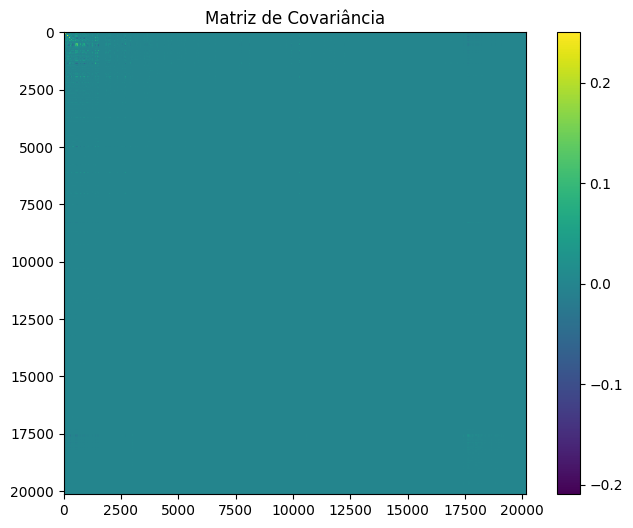

In [83]:
#Gene families
# Plotar matriz de covariância
covariance_matrix = np.cov(X.T)
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Covariância')
#plt.savefig('/home/wi38kap/BacterialData/matriz_covarianciafiltered.png')  # Salvar a matriz de covariância como imagem
#plt.savefig(r'C:\Users\00pau\matriz_covariancia.png') 
plt.show()

In [106]:
#kmers
# Plotar matriz de covariância
covariance_matrix = np.cov(X.T)
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Covariância')
#plt.savefig('/home/wi38kap/BacterialData/matriz_covarianciafiltered.png')  # Salvar a matriz de covariância como imagem
#plt.savefig(r'C:\Users\00pau\matriz_covariancia.png') 
plt.show()

MemoryError: Unable to allocate 128. GiB for an array with shape (131072, 131072) and data type float64